# functions

In [1]:
import multiprocessing
import pickle
from tqdm import tqdm
import itertools

In [2]:
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def print_same_line(txt):
    clear_output(wait=True)
    print(txt)

# format results

Import modules
Define functions
Load amacGFP data
amacGFP 239 aa


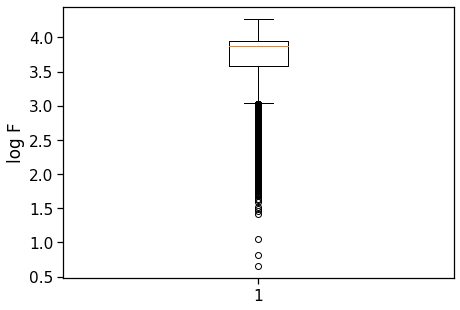

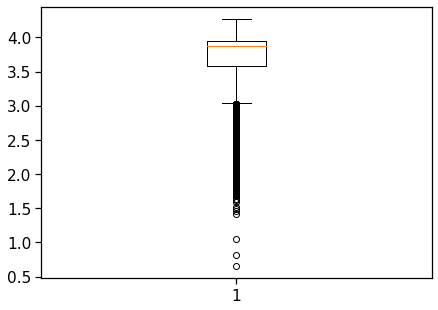

Pre-processing amacGFP
Split train, valid, test sets
Processing aa_genotype_pseudo, amacGFP


100%|██████████| 1617/1617 [00:12<00:00, 128.69it/s]


Import modules
Define functions
Load avGFP data
avGFP 239 aa


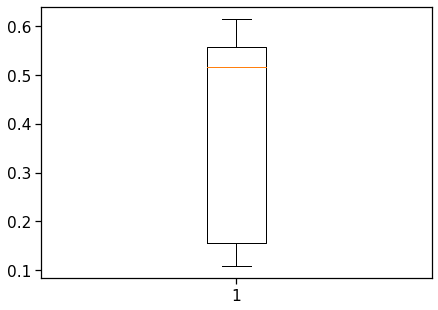

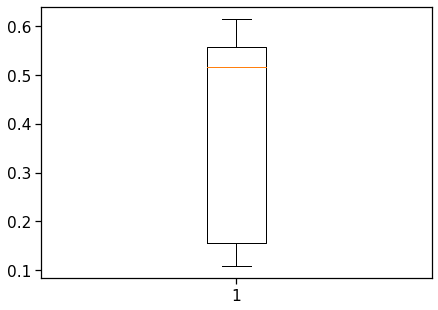

Pre-processing avGFP
Split train, valid, test sets
Processing aa_genotype_pseudo, avGFP


100%|██████████| 1811/1811 [00:15<00:00, 116.07it/s]


Import modules
Define functions
Load cgreGFP data
cgreGFP 236 aa


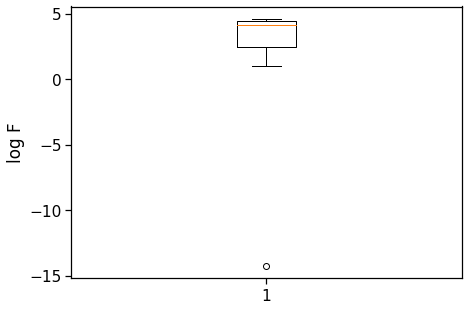

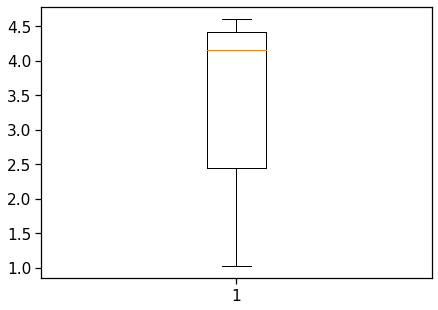

Pre-processing cgreGFP
Split train, valid, test sets
Processing aa_genotype_pseudo, cgreGFP


100%|██████████| 1634/1634 [00:08<00:00, 193.65it/s]


Import modules
Define functions
Load ppluGFP data
ppluGFP 223 aa


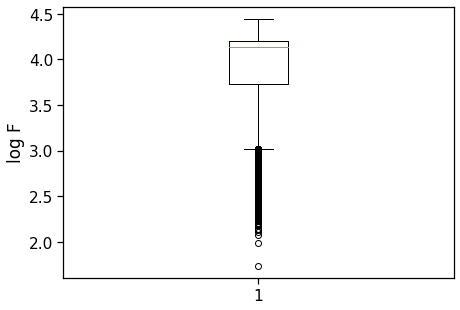

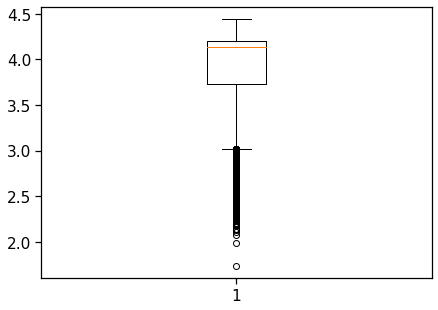

Pre-processing ppluGFP
Split train, valid, test sets
Processing aa_genotype_pseudo, ppluGFP


100%|██████████| 1449/1449 [00:11<00:00, 121.05it/s]


Import modules
Define functions
Load amacGFP data
amacGFP 239 aa


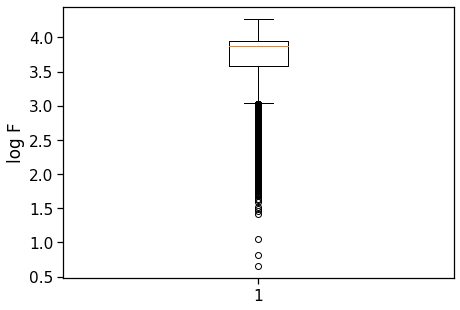

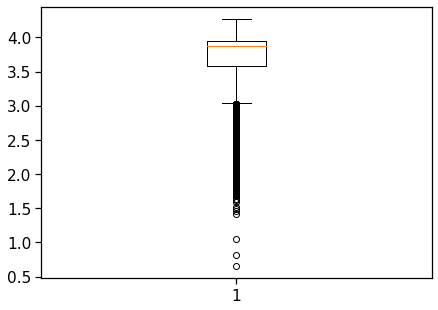

Pre-processing amacGFP
Split train, valid, test sets
Processing aa_genotype_native, amacGFP


100%|██████████| 1617/1617 [00:14<00:00, 112.96it/s]


Import modules
Define functions
Load avGFP data
avGFP 239 aa


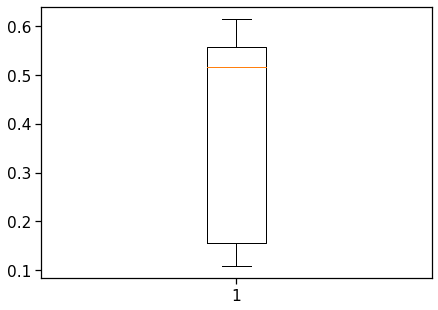

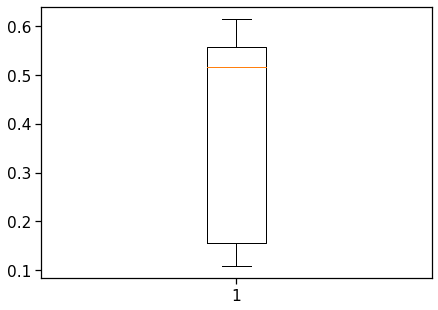

Pre-processing avGFP
Split train, valid, test sets
Processing aa_genotype_native, avGFP


100%|██████████| 1811/1811 [00:17<00:00, 106.40it/s]


Import modules
Define functions
Load cgreGFP data
cgreGFP 236 aa


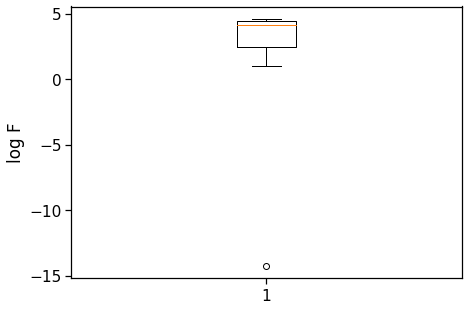

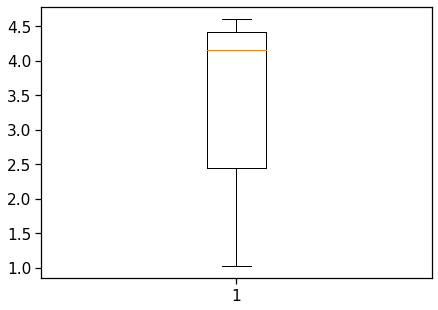

Pre-processing cgreGFP
Split train, valid, test sets
Processing aa_genotype_native, cgreGFP


100%|██████████| 1634/1634 [00:08<00:00, 182.13it/s]


Import modules
Define functions
Load ppluGFP data
ppluGFP 223 aa


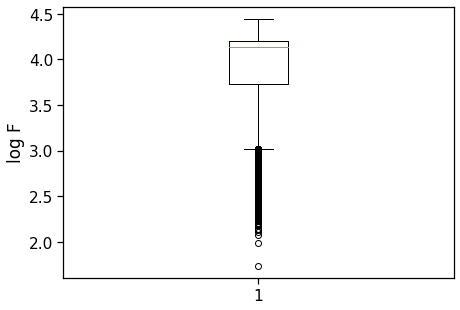

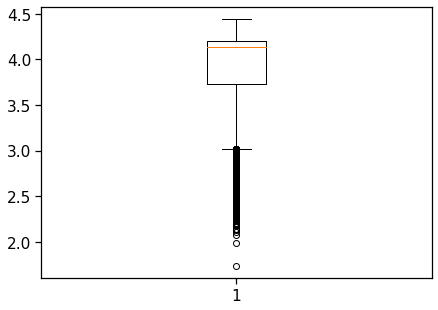

Pre-processing ppluGFP
Split train, valid, test sets
Processing aa_genotype_native, ppluGFP


100%|██████████| 1449/1449 [00:11<00:00, 126.98it/s]


In [3]:
# decide whether to recompute or not

for column_to_use,suffix in zip(("aa_genotype_pseudo","aa_genotype_native"),("","_native")):
    mutations_in_all_backgrounds={}
    
    for gene_name in ["amacGFP","avGFP","cgreGFP","ppluGFP"]:

        # load dataset
        load_encodings=False
        showmatrix=False
        %run 01_preprocessing.ipynb
        
        if gene_name=="avGFP":
            df = df.rename(columns={'aaMutations': 'aa_genotype_native'})
        
        print(f"Processing {column_to_use}, {gene_name}")


        # list all mutations and genotypes
        all_mutations = sorted(list(set(flatten([genotype.split(":") for genotype in list(df[column_to_use])]))))
        genotypes_and_indexes={tuple(row[column_to_use].split(":")):ID for ID,row in df.iterrows()}

        # for each mutation, get genotypes that contain this mutation, 
        # then look if the same genotypes without said mutation are available too
        results={}

        for mut in tqdm(all_mutations):

            results.setdefault(mut,{"genotypes":[],
                                    "background":[],
                                    "with_mut":[]})

            genotypes_w_mut = {genotype:ID for genotype,ID in genotypes_and_indexes.items() if mut in genotype}

            for genotype_w_mut,ID_w_mut in genotypes_w_mut.items():
                genotype_wo_mut = tuple([m for m in genotype_w_mut if m!= mut])
                if genotype_wo_mut==():genotype_wo_mut=("wt",)

                ID_wo_mut = genotypes_and_indexes.get(genotype_wo_mut,False)

                if type(ID_wo_mut)==int:

                    fluo_w_mut  = df.loc[ID_w_mut][brightness_col]
                    fluo_wo_mut = df.loc[ID_wo_mut][brightness_col]

                    results[mut]["genotypes"].append(":".join(genotype_wo_mut))
                    results[mut]["with_mut"].append(fluo_w_mut)
                    results[mut]["background"].append(fluo_wo_mut)

            results[mut]["genotypes"]=[g if g!="wt" else "" for g in results[mut]["genotypes"]]

            results[mut]=pd.DataFrame.from_dict(results[mut],orient="columns") 
            results[mut] = results[mut].set_index(keys=["genotypes"],drop=True)
            results[mut].index.name=None

        mutations_in_all_backgrounds[gene_name]=results
        
    output_pickle = join(cachedDataPath,f"all_mutations_in_all_backgrounds_dict_with_avGFP{suffix}.pkl")
    with open(output_pickle,"wb") as f:
        pickle.dump(mutations_in_all_backgrounds,f)
    


<b>Note: This notebook saves one pickle for native mutations and one pickle for pseudo mutations</b>